------------->>>>>>>>>>>>>REGULA FALSI METHOD<<<<<<<<<<<<<-------------------

The root of the function is = 0.9996886513360608 39 

------------->>>>>>>>>>>>> MODIFIED REGULA FALSI METHOD<<<<<<<<<<<<<-------------------

The root of the function is = 0.9999186317806551 20


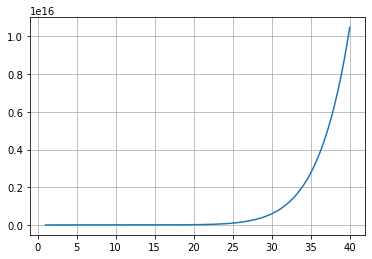

In [81]:
from math import  sin, exp


def test_func1(x):            #used to derive f(x) from x
    return x**10 - 1
def test_func11(y):           #used to derive x from f(x)
    #y = x**10 - 1
    x = (y+1)**0.1
    return x

def test_func2(c):
    return (9.8*68.1/c)*(1 - exp(-10*c/68))-40
def test_func21(y):
    x = ((y+40)/9.8*68.1)

    
print("------------->>>>>>>>>>>>>REGULA FALSI METHOD<<<<<<<<<<<<<-------------------\n")
def false_position(func, x_lower, x_upper, tol, iter_max = 200):
    iter = 0
    ea = 100000
    f_x_lower = func(x_lower)
    f_x_upper = func(x_upper)

    if (f_x_lower * f_x_upper > 0):
        print("The given interval does not bracket the root or the interval has multiple roots")
        return

    x_root = (x_lower + x_upper)/2 

    #
    while(ea > tol and iter < iter_max): 
        x_root_old = x_root
        x_root = x_upper - (func(x_upper)*(x_lower - x_upper))/(func(x_lower) - func(x_upper))

        f_x_root = func(x_root)

        if (f_x_lower * f_x_root <= 0): 
            x_upper = x_root
            f_x_upper = f_x_root
            
        else:
            x_lower = x_root
            f_x_lower = f_x_root
        
        ea = abs((x_root - x_root_old)/x_root)*100 #Relative error
        iter += 1
    
    return (x_root, iter)


sol = false_position(test_func1, 0, 1.3, 0.01)

print("The root of the function is =", sol[0], sol[1],"\n")





print("------------->>>>>>>>>>>>> MODIFIED REGULA FALSI METHOD<<<<<<<<<<<<<-------------------\n")   
    
def modified_false_position(func,func1, x_lower, x_upper, tol, iter_max = 200):
    iter = 1
    ea = 100000
    f_x_lower = func(x_lower)
    f_x_upper = func(x_upper)

    if (f_x_lower * f_x_upper > 0):
        print("The given interval does not bracket the root or the interval has multiple roots")
        return

    x_root = (x_lower + x_upper)/2 

    xupper_new = x_upper
    while(ea > tol and iter < iter_max):
        if iter%3 == 0:
            x_root_old = x_root
            xupper_new = func1(func(xupper_new)/2)
            #print(xupper_new)
            x_root = xupper_new - (func(xupper_new)*(x_lower - xupper_new))/(func(x_lower) - func(xupper_new))

            f_x_root = func(x_root)

            if (f_x_lower * f_x_root <= 0): 
                x_upper = x_root
                f_x_upper = f_x_root

            else:
                x_lower = x_root
                f_x_lower = f_x_root
            
        else:
            x_root_old = x_root
            x_root = x_upper - (func(x_upper)*(x_lower - x_upper))/(func(x_lower) - func(x_upper))

            f_x_root = func(x_root)

            if (f_x_lower * f_x_root <= 0): 
                x_upper = x_root
                f_x_upper = f_x_root

            else:
                x_lower = x_root
                f_x_lower = f_x_root
        
        ea = abs((x_root - x_root_old)/x_root)*100 #Relative error
        iter += 1
    
    return (x_root, iter)


sol = modified_false_position(test_func1, test_func11, 0, 1.3, 0.01)

print("The root of the function is =", sol[0], sol[1])
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(1,40,200)
y_values = [test_func1(x_value) for x_value in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()

The root of the function is = 6.5 2


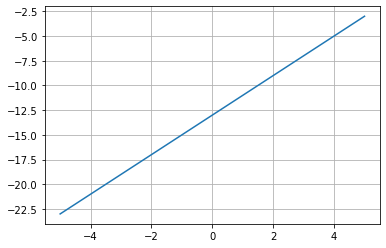

In [79]:
from math import  sin, exp
def test_func31(y):
    x = (y+13)/2
    return x
def test_func3(x):
    y = 2*x-13
    return y


def modified_false_position(func,func1, x_lower, x_upper, tol, iter_max = 200):
    iter = 1
    ea = 100000
    f_x_lower = func(x_lower)
    f_x_upper = func(x_upper)

    if (f_x_lower * f_x_upper > 0):
        print("The given interval does not bracket the root or the interval has multiple roots")
        return

    x_root = (x_lower + x_upper)/2 
    y_values1 = []

    xupper_new = x_upper
    while(ea > tol and iter < iter_max):
        if iter%3 == 0:
            x_root_old = x_root
            xupper_new = func1(func(xupper_new)/2)
            y_values1.append(xupper_new)
            print(xupper_new)
            x_root = xupper_new - (func(xupper_new)*(x_lower - xupper_new))/(func(x_lower) - func(xupper_new))

            f_x_root = func(x_root)

            if (f_x_lower * f_x_root <= 0): 
                x_upper = x_root
                f_x_upper = f_x_root

            else:
                x_lower = x_root
                f_x_lower = f_x_root
            
        else:
            x_root_old = x_root
            x_root = x_upper - (func(x_upper)*(x_lower - x_upper))/(func(x_lower) - func(x_upper))
            y_values1.append(x_upper)
            f_x_root = func(x_root)

            if (f_x_lower * f_x_root <= 0): 
                x_upper = x_root
                f_x_upper = f_x_root

            else:
                x_lower = x_root
                f_x_lower = f_x_root
        
        ea = abs((x_root - x_root_old)/x_root)*100 #Relative error
        iter += 1
        xl_values = [x_lower for i in range(iter-1)]
    return (x_root, iter)


sol = modified_false_position(test_func3, test_func31, 5, 8, 0.01)

#sol = false_position(test_func2, 12, 16, 0.01)
print("The root of the function is =", sol[0], sol[1])

import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(-5,5,200)
y_values = [test_func3(x_value) for x_value in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()